# Importing Packages

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Importing Data

In [3]:
# df=pd.read_excel("/content/http://localhost:8888/edit/Flight_data.xlsxdrive/My Drive/flight fare pediction/Data_Train.xlsx")
df = pd.read_excel("Flight_data.xlsx")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.shape

(10683, 11)

# Filtering Null Values

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Finding Unique Values and Encoding
For better understanding of Machine

In [9]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [10]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [11]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [12]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [13]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [15]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Additional Info is not a good distribution for training 
So we will remove this

In [16]:
df.drop('Additional_Info',axis=1,inplace=True)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


# Label Encoding for Unique Values

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()

In [25]:
encoder.fit(df.Airline)

LabelEncoder()

In [26]:
df['Airline'] = encoder.transform(df.Airline)

In [27]:
encoder.classes_

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [28]:
df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [29]:
df['Source'] = encoder.fit_transform(df['Source'])

In [30]:
encoder.classes_

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [31]:
df['Destination'] = encoder.fit_transform(df['Destination'])

In [32]:
encoder.classes_

array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype=object)

In [33]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [34]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Converting Total Stops to number

In [35]:
df['Total_Stops'] = df.Total_Stops.apply(lambda x:'0 stop' if x=='non-stop' else x)

In [36]:
df['Total_Stops'] = df.Total_Stops.apply(lambda x:int(x.split()[0]))

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302


# Working With Time

In [41]:
df['Date_of_Journey'] =pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  int32         
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  int32         
 3   Destination      10682 non-null  int32         
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  int64         
 9   Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 792.8+ KB


dep_time to dep_time hour of the day

In [43]:
df['Dep_Time'] = df.Dep_Time.apply(lambda x:int(x.split(':')[0]))

same for arriving time

In [44]:
df['Arrival_Time'] = df.Arrival_Time.apply(lambda x:int(x.split(':')[0]))

Adjustments with time

In [47]:
df['Arrival_Time'] = df[['Dep_Time','Arrival_Time']].apply(lambda x:x['Arrival_Time']+24 if x['Dep_Time']>x['Arrival_Time'] else x['Arrival_Time'],axis=1)

Note: - Arrival time is shown as Dep_time + Duration Time

In [46]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3,2019-03-24,0,5,BLR → DEL,22,25,2h 50m,0,3897
1,1,2019-05-01,3,0,CCU → IXR → BBI → BLR,5,13,7h 25m,2,7662
2,4,2019-06-09,2,1,DEL → LKO → BOM → COK,9,28,19h,2,13882
3,3,2019-05-12,3,0,CCU → NAG → BLR,18,23,5h 25m,1,6218
4,3,2019-03-01,0,5,BLR → NAG → DEL,16,21,4h 45m,1,13302


Month of journey

In [48]:
df['Month_of_Journey'] =  df['Date_of_Journey'].map(lambda x:x.month)

Duration in minutes

In [49]:
def duration_time(x):
    x = x.split()
    x = list(map(lambda t:int(t[:-1]),x))
    if len(x) == 1:
        return x[0]*60
    else:
        return x[0]*60 + x[1]

In [50]:
df['Duration'] =  df['Duration'].apply(duration_time)

In [51]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
0,3,2019-03-24,0,5,BLR → DEL,22,25,170,0,3897,3
1,1,2019-05-01,3,0,CCU → IXR → BBI → BLR,5,13,445,2,7662,5
2,4,2019-06-09,2,1,DEL → LKO → BOM → COK,9,28,1140,2,13882,6
3,3,2019-05-12,3,0,CCU → NAG → BLR,18,23,325,1,6218,5
4,3,2019-03-01,0,5,BLR → NAG → DEL,16,21,285,1,13302,3


# Target Data Visualization

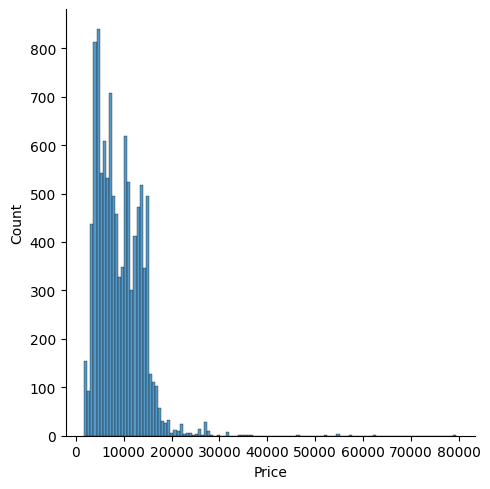

In [56]:
sns.displot(df['Price'],kde=False)

As you can see output data is not Distributed Uniformally
To make it uniform we will remove data of price > 40000

In [57]:
df[df['Price']>40000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
657,5,2019-03-01,0,5,BLR → BOM → DEL,5,10,300,1,52229,3
1478,4,2019-03-18,0,5,BLR → BOM → DEL,18,24,365,1,54826,3
2618,4,2019-03-18,0,5,BLR → BOM → DEL,22,29,375,1,54826,3
2924,5,2019-03-01,0,5,BLR → BOM → DEL,5,11,340,1,79512,3
5372,5,2019-03-01,0,5,BLR → BOM → DEL,5,12,400,1,62427,3
5439,4,2019-03-01,0,5,BLR → BOM → DEL,16,23,365,1,54826,3
7351,5,2019-03-03,2,1,DEL → ATQ → BOM → COK,20,28,500,2,46490,3
9715,5,2019-03-06,2,1,DEL → ATQ → BOM → COK,20,28,500,2,52285,3
10364,5,2019-03-01,0,5,BLR → MAA → DEL,9,14,280,1,57209,3


In [58]:
df.drop(df[df['Price']>40000].index,inplace=True)

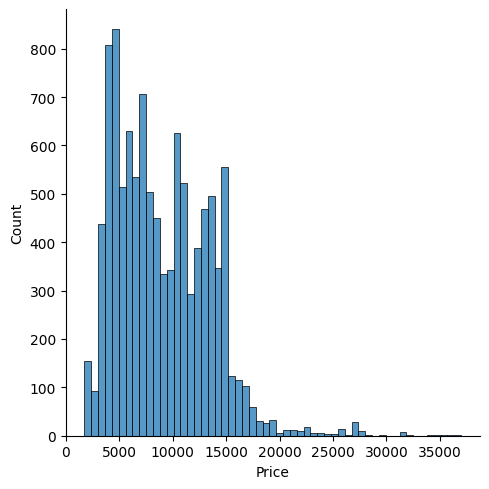

In [59]:
sns.displot(df['Price'],kde=False)

Better Than Before

# Inputs For Model

In [60]:
df._get_numeric_data().head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey
0,3,0,5,22,25,170,0,3897,3
1,1,3,0,5,13,445,2,7662,5
2,4,2,1,9,28,1140,2,13882,6
3,3,3,0,18,23,325,1,6218,5
4,3,0,5,16,21,285,1,13302,3


In [61]:
X = df._get_numeric_data().drop('Price',axis=1)

In [62]:
y = df['Price']

Splitting of Data in the ratio of 70% , 30% for testing

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [66]:
from sklearn.linear_model import LinearRegression

In [79]:
model  = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
predictions = model.predict(X_test)

# Predictions Visualization

<Axes: xlabel='Price'>

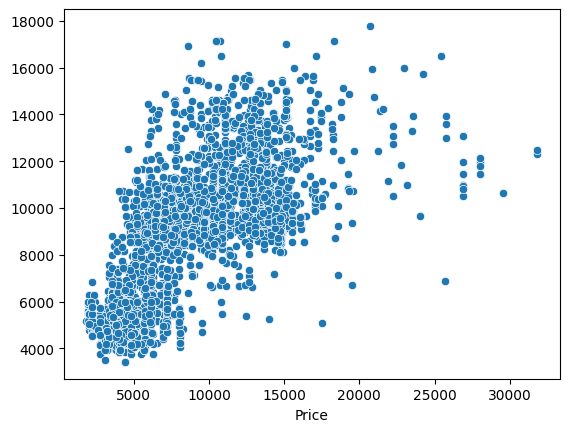

In [83]:
sns.scatterplot(x=y_test,y=predictions)

Looking at the visualization we can tell that scatterplot fits around a Straight line.

It means that Model is not evaluating randomly.

And It works Good

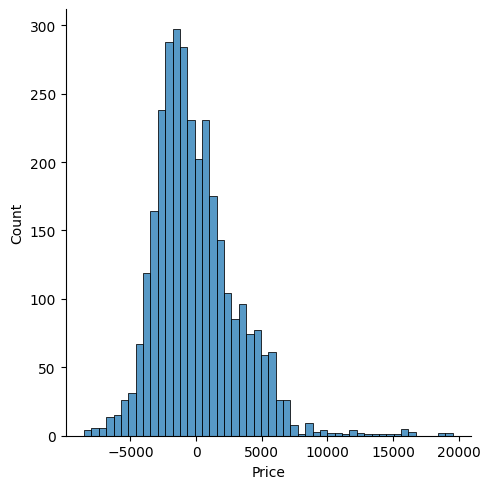

In [84]:
sns.displot((y_test-predictions),bins=50,kde=False)

# Error Calculation

In [76]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2408.9153026730346
MSE: 10060929.120353466
RMSE: 3171.8967701287925


# Output:

This model is predicting values of the fare with an error of 2400 rs.

This Output also contains price above 35000 so it's not a bad prediction.